In [ ]:
import pandas as pd
import numpy as np
from google.colab import files
from google.colab import drive

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
try:
  df  = pd.read_csv('/content/drive/MyDrive/Nasi Goreng Babat/camera_dataset.csv') #ganti path sesuai drive masing masing
except:
  print("File tidak ditemukan cik\n Silahkan upload file dibawah ini")
  uploaded = files.upload()
  nama_file = list(uploaded.keys())[0]
  df  = pd.read_csv(nama_file)

In [ ]:
df.head()

,Model,Release date,Max resolution,Low resolution,Effective pixels,Zoom wide (W),Zoom tele (T),Normal focus range,Macro focus range,Storage included,Weight (inc. batteries),Dimensions,Price
0,Agfa ePhoto 1280,1997,1024.0,640.0,0.0,38.0,114.0,70.0,40.0,4.0,420.0,95.0,179.0
1,Agfa ePhoto 1680,1998,1280.0,640.0,1.0,38.0,114.0,50.0,0.0,4.0,420.0,158.0,179.0
2,Agfa ePhoto CL18,2000,640.0,0.0,0.0,45.0,45.0,0.0,0.0,2.0,0.0,0.0,179.0
3,Agfa ePhoto CL30,1999,1152.0,640.0,0.0,35.0,35.0,0.0,0.0,4.0,0.0,0.0,269.0
4,Agfa ePhoto CL30 Clik!,1999,1152.0,640.0,0.0,43.0,43.0,50.0,0.0,40.0,300.0,128.0,1299.0


In [ ]:
X = df.iloc[:, 2:3].values # mengambil data max resolution
y = df.iloc[:, 12].values # mengambil data price

In [ ]:
X.shape

(1038, 1)

In [ ]:
y.shape

(1038,)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
xtrain, xtest, ytrain, ytest = train_test_split(X, y, train_size=0.7, shuffle=False)

In [ ]:
print("Bayanknya data latih setelah dilakukan train-test split: ", len(xtrain))
print("Bayanknya data uji setelah dilakukan train-test split: ", len(xtest))

Bayanknya data latih setelah dilakukan train-test split:  726
Bayanknya data uji setelah dilakukan train-test split:  312


In [ ]:
from sklearn import linear_model

In [ ]:
regr = linear_model.LinearRegression()

In [ ]:
regr.fit(xtrain,ytrain)

LinearRegression()

In [ ]:
print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)

Intercept: 
 -231.96317382872996
Coefficients: 
 [0.28560846]


In [ ]:
regr.score(xtrain,ytrain)

0.07185048010942185

In [ ]:
regr.score(xtest,ytest)

-0.2544356102886256

In [ ]:
y_pred=regr.predict(xtest)

In [ ]:
pd.DataFrame(zip(ytest,y_pred),columns=['ytest','ypred'])

,ytest,ypred
0,1499.0,352.962954
1,1499.0,426.078720
2,1499.0,499.194486
3,1499.0,426.078720
4,1499.0,499.194486
...,...,...
307,62.0,352.962954
308,62.0,352.962954
309,62.0,352.962954
310,62.0,453.497132


In [ ]:
import matplotlib.pyplot as plt

In [ ]:
y_pred

array([352.96295368, 426.07871962, 499.19448556, 426.07871962,
       499.19448556, 572.3102515 , 645.42601744, 864.77331525,
       974.44696416, 426.07871962, 499.19448556, 499.19448556,
       572.3102515 , 645.42601744, 645.42601744, 499.19448556,
       572.3102515 , 645.42601744, 133.61565587, 225.01036329,
       225.01036329, 627.14707595, 627.14707595, 627.14707595,
       627.14707595, 627.14707595, 627.14707595, 627.14707595,
       873.912786  , 627.14707595, 225.01036329, 352.96295368,
       352.96295368, 352.96295368, 352.96295368, 352.96295368,
       352.96295368, 352.96295368, 407.79977814, 407.79977814,
       421.50898425, 421.50898425, 499.19448556, 508.3339563 ,
       508.3339563 , 581.44972224, 640.85628207, 700.26284189,
       809.9364908 , 809.9364908 , 572.3102515 , 572.3102515 ,
       645.42601744, 700.26284189, 572.3102515 , 645.42601744,
       645.42601744, 700.26284189, 426.07871962, 352.96295368,
       809.9364908 , 352.96295368, 426.07871962, 426.07

In [ ]:
x = np.arange(1, 313 ,dtype=int)
x

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
       105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
       118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130,
       131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143,
       144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156,
       157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169,
       170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 18

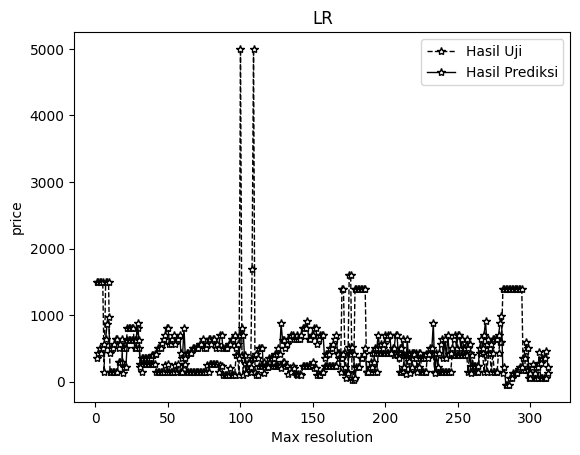

In [ ]:
df=pd.DataFrame({'x_values': x, 'y1_values': ytest, 'y2_values': y_pred}  )
plt.plot( 'x_values', 'y1_values', data=df, marker='*', markerfacecolor='white', markersize=6, color='black', linewidth=1, linestyle='dashed', label="Hasil Uji")
plt.plot( 'x_values', 'y2_values', data=df, marker='*', markerfacecolor='white', markersize=6, color='black', linewidth=1, label="Hasil Prediksi")
plt.legend()
plt.title('LR')
plt.xlabel('Max resolution')
plt.ylabel('price')
# show graph
plt.show()